## Solving:

## $H = \frac{- \hbar^2}{2 m} (\partial_x^2 + \partial_y^2) - i \alpha (\partial_x \sigma_y - \partial_y \sigma_x) + E_Z \sigma_z + V(y)$

## Import libraries

In [1]:
import kwant
import numpy as np

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})

import os.path
def save_image(name):
    folder = "./figures/"
    if os.path.exists(folder + name + ".png"):
        raise Exception("File already exist")
        return 0
    
    plt.savefig(folder + name + ".png", dpi=300)

## Create an “empty” tight binding system, define matrices

In [2]:
syst = kwant.Builder()
e_z = 0.1 # 0.08 0.5
alpha = 0.5
t = 1
W = 10
L = 30

a = 1
lat = kwant.lattice.square(a)

In [3]:
identity = np.array([[1,0], [0,1]])
pauli_x = np.array([[0,1], [1,0]])
pauli_y = np.array([[0,-1j], [1j,0]])
pauli_z = np.array([[1,0], [0,-1]])

## Set its matrix elements and hoppings.

In [4]:
# on site terms
syst[(lat(x, y) for x in range(L) for y in range(W))] = 4 * t * identity + e_z * pauli_z
# hoppings in x-direction
syst[kwant.builder.HoppingKind((1, 0), lat, lat)] = -t * identity + 1j * alpha * pauli_y / 2
# hoppings in y-directions
syst[kwant.builder.HoppingKind((0, 1), lat, lat)] = -t * identity - 1j * alpha * pauli_x / 2

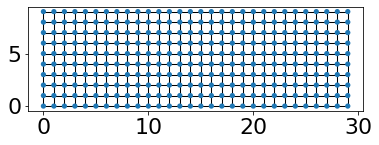

In [5]:
_ = kwant.plot(syst)

## Attach leads (tight binding systems with translational symmetry).

In [6]:
sym_lead = kwant.TranslationalSymmetry((-a, 0))
lead = kwant.Builder(sym_lead)

In [7]:
lead[(lat(0, j) for j in range(W))] = 4 * t * identity + e_z * pauli_z
# hoppings in x-direction
lead[kwant.builder.HoppingKind((1, 0), lat, lat)] = -t * identity + 1j * alpha * pauli_y / 2
# hoppings in y-directions
lead[kwant.builder.HoppingKind((0, 1), lat, lat)] = -t * identity - 1j * alpha * pauli_x / 2

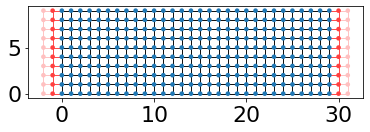

In [8]:
syst.attach_lead(lead)
syst.attach_lead(lead.reversed())
_ = kwant.plot(syst)

In [9]:
syst = syst.finalized()

## Pass the finalized system to a solver.

In [10]:
energies = []
data = []

for ie in range(1000):
    energy = ie * 0.001

    # compute the scattering matrix at a given energy
    smatrix = kwant.smatrix(syst, energy)
    
    # compute the transmission probability from lead 0 to
    # lead 1
    energies.append(energy)
    data.append(smatrix.transmission(1, 0))

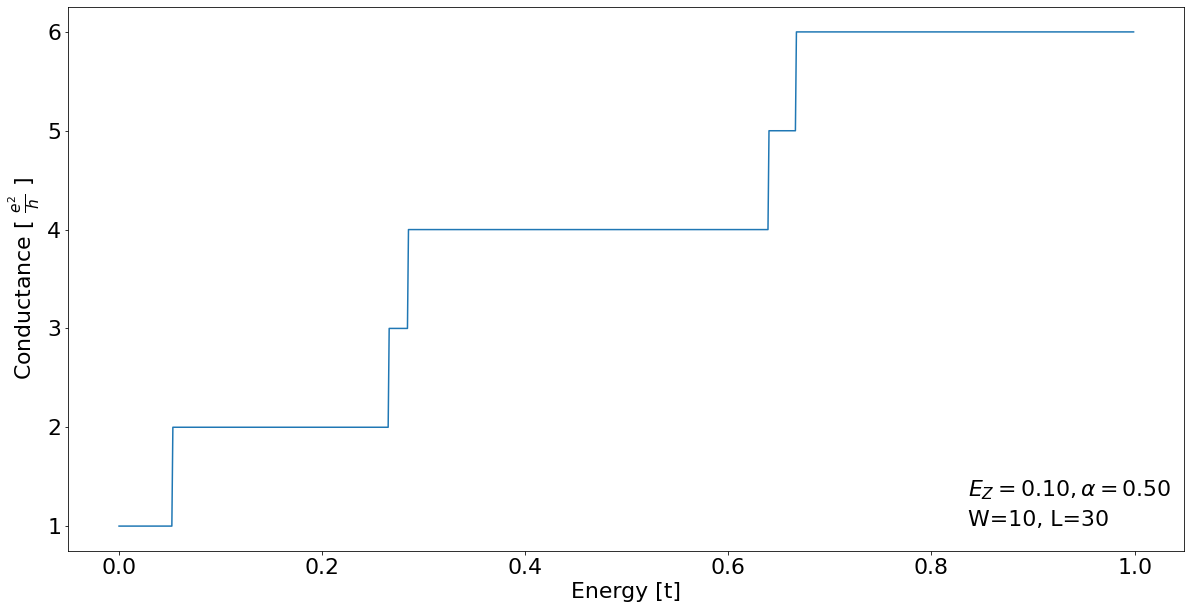

In [12]:
plt.figure(figsize=(20,10))
plt.plot(energies, data)

plt.xlabel("Energy [t]")
plt.ylabel(r'Conductance [ $\frac{e^2}{h}$ ]')

plt.figtext(.75, .16, "W=%d, L=%d" %(W,L))
plt.figtext(.75, .2, r'$E_Z=%.2f, \alpha=$%.2f' %(e_z, alpha))

save_image("conductance2.8")
plt.show()